# Test Task for Code Reviewer

## Task 1. Working with data

To complete this task, use the data set in the attached file. Indicate the answer to each of the
following steps and time to complete the entire task.

1.1. Download the data set movie_metadata.csv, which contains data about films from IMDb
(Internet Movie Database).

[movie_metadata.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ad88c1ae-a16a-4a9b-a0dd-a12ecc5a9568/movie_metadata.csv)

1.2. The duration column contains data on the film length. How many missing values are there
in this column?

1.3. Replace the missing values in the duration column with the median value for this column.

1.4. What is the average film length? Give the answer as a floating-point figure rounded to
two decimal places.

1.5. Create a movie_duration_category column, which will contain three categories
depending on the film length:
• Category "1. <90" if the film is less than 90 minutes long
• Category "2. 90–120" if the film is between 90 minutes and two hours long (inclusively)
• Category "3. >120" if the film is more than two hours long

1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of
films:
• Table rows: year
• Table columns: movie duration category ("<90", "90–120", ">120")
• The year of release should be displayed in the YYYY format.

1.7. How many films between 90 minutes and two hours long were released in 2008?

1.8. The plot_keywords column holds keywords characterizing the film's plot. Using the data
in this column, create a column called movie_plot_category, to contain four categories
depending on the key words in the column:
• Category "love_and_death" if the keywords include both "love" and "death"
• Category "love" if the keywords include the word "love"
• Category "death" if the keywords include the word "death"
• Category "other" if the keywords do not meet the conditions above

1.9. The imdb_score column shows a viewer rating for the film. Build a table to reflect the
average rating of films depending on which movie_plot_category category they belong to.

1.10. What is the average rating of films in the "love" category? Give the answer as a floatingpoint
figure rounded to two decimal places.

1.11. The budget column contains the film's budget. What is the median budget for all the films
listed? Give the answer as an integer.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000


In [3]:
# 1.2. The duration column contains data on the film length. How many missing values are there in this column?
df.isna().sum()['duration']

15

In [4]:
# 1.3. Replace the missing values in the duration column with the median value for this column.
values = {'duration': df.duration.median()}
df.fillna(value=values, inplace=True)

In [5]:
# 1.4. What is the average film length? Give the answer as a floating-point figure rounded to two decimal places.
round(df.duration.mean(), 2)

107.19

In [6]:
# 1.5. Create a movie_duration_category column, 
# which will contain three categories depending on the film length: 
# • Category "1. <90" if the film is less than 90 minutes long 
# • Category "2. 90–120" if the film is between 90 minutes and two hours long (inclusively) 
# • Category "3. >120" if the film is more than two hours long
df['movie_duration_category'] = 'Unknown'
df.loc[df['duration'] < 90, 'movie_duration_category'] = 'Category "1'
df.loc[df['duration'].between(90, 120), 'movie_duration_category'] = 'Category "2'
df.loc[df['duration'] >120, 'movie_duration_category'] = 'Category "3'

df['movie_duration_category'].value_counts()

Category "2    3184
Category "3    1067
Category "1     792
Name: movie_duration_category, dtype: int64

In [7]:
# 1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of films: 
# • Table rows: year 
# • Table columns: movie duration category ("<90", "90–120", ">120") 
# • The year of release should be displayed in the YYYY format.
summary_year = pd.get_dummies(df[['movie_duration_category', 'title_year']]).query('title_year >= 2000').groupby(['title_year']).sum()
summary_year.index = summary_year.index.astype(int)
summary_year.index.names = ['year']
summary_year.rename(columns={'movie_duration_category_Category "1': '<90',
                             'movie_duration_category_Category "2': '90–120',
                             'movie_duration_category_Category "3': '>120'}, inplace=True)
summary_year

,<90,90–120,>120
year,,,
2000,25,112,34
2001,29,120,39
2002,36,146,27
2003,31,108,30
2004,30,142,42
2005,31,142,48
2006,40,146,53
2007,31,130,43
2008,29,160,36


In [8]:
# 1.7. How many films between 90 minutes and two hours long were released in 2008?
df.loc[df['duration'].between(90, 120)].query('title_year == 2008').count()['movie_title']

160

In [9]:
# 1.8. The plot_keywords column holds keywords characterizing the film's plot. 
# Using the data in this column, create a column called movie_plot_category, 
# to contain four categories depending on the key words in the column: 
# • Category "love_and_death" if the keywords include both "love" and "death" 
# • Category "love" if the keywords include the word "love" 
# • Category "death" if the keywords include the word "death" 
# • Category "other" if the keywords do not meet the conditions above
df['plot_keywords']

df['movie_plot_category'] = 'other'
df.loc[df.plot_keywords.str.contains('love', na=False) & df.plot_keywords.str.contains('death', na=False), 'movie_plot_category'] = 'love_and_death'
df.loc[df.plot_keywords.str.contains('love', na=False), 'movie_plot_category'] = 'love'
df.loc[df.plot_keywords.str.contains('death', na=False), 'movie_plot_category'] = 'death'

df['movie_plot_category'].value_counts()

other    4621
love      234
death     188
Name: movie_plot_category, dtype: int64

In [10]:
# 1.9. The imdb_score column shows a viewer rating for the film. 
# Build a table to reflect the average rating of films depending on which movie_plot_category category they belong to.
df[['movie_plot_category', 'imdb_score']].groupby(['movie_plot_category']).mean()

,imdb_score
movie_plot_category,
death,6.532979
love,6.580769
other,6.431422


In [11]:
# 1.10. What is the average rating of films in the "love" category? Give the answer as a floatingpoint figure rounded to two decimal places.
round(df[['movie_plot_category', 'imdb_score']].groupby(['movie_plot_category']).mean().loc['love'], 2)

imdb_score    6.58
Name: love, dtype: float64

In [12]:
# 1.11. The budget column contains the film's budget. What is the median budget for all the films listed? Give the answer 
round(pd.to_numeric(df.budget.str.replace('$', '', regex=True)).mean(), 2)

35874316.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Task 2. Problem-solving

To complete this task, use the data set in the attached file. Indicate the answer to each of the
following steps and time to complete the entire task.

[event_data.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/3d249c69-fd8f-419f-8606-554c9a089cd7/event_data.csv)

1. Download the event_data.csv dataset, which contains data on the use of the mobile
application of users who registered from July 29 to September 1, 2019:
• user_id - user identifier;
• event_date - time of the event;
• event_type - type of event: registration - registration in the application; simple_event click event in the application; 
• purchase - an event of purchase within the application;
purchase_amount - purchase amount.

2. Highlight user cohorts based on the week of registration in the application. The cohort
identifier should be the week ordinal (for example, the week from July 29 to August 4
should have identifier 31).

3. How many unique users in the cohort with ID 33?

4. For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The
lifetime indicator is calculated based on the serial number of the week in which the event
is committed, relative to the week of registration. For example, an event committed on
August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero
week of lifetime, and an event committed by the same user on August 5 will be committed
on the first week of lifetime).

5. Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

6. What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent,
rounded to 2 decimal places, inclusive.

7. Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying
User) for cohorts depending on lifetime.

8. What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point
number, rounded to 2 decimal places, inclusive.

9. What is the median time between user registration and first purchase? Give the answer
in seconds (!) As an integer.

In [14]:
import pandas as pd
import numpy as np
import datetime

In [15]:
df2 = pd.read_csv('event_data.csv')
df2.head(3)

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          79742 non-null  object 
 1   event_date       79742 non-null  object 
 2   event_type       79742 non-null  object 
 3   purchase_amount  6207 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [17]:
df2.isna().sum()

user_id                0
event_date             0
event_type             0
purchase_amount    73535
dtype: int64

In [18]:
# 2.Highlight user cohorts based on the week of registration in the application. 
# The cohort identifier should be the week ordinal (for example, the week from July 29 to August 4 should have identifier 31).
df2['date_time'] = pd.to_datetime(df2['event_date'])
df2['date_week'] = df2['date_time'].dt.isocalendar().week
df2['date_week'] = df2['date_week'].apply(int)
df2[['date_week', 'user_id']].head()

,date_week,user_id
0,31,c40e6a
1,31,a2b682
2,31,9ac888
3,31,93ff22
4,31,65ef85


In [19]:
# 3.How many unique users in the cohort with ID 33?
len(pd.unique(df2.query('date_week == 33')['user_id']))

5102

In [20]:
df2['user_id'].value_counts()

aef0ea    24
e43583    24
2c8868    23
5fb555    23
8c9156    23
          ..
6031d5     1
3f5c29     1
615a35     1
01d643     1
48b765     1
Name: user_id, Length: 9996, dtype: int64

In [21]:
df2.query('user_id == "aef0ea"')

,user_id,event_date,event_type,purchase_amount,date_time,date_week
431,aef0ea,2019-07-30 05:23:18,registration,NaN,2019-07-30 05:23:18,31
1710,aef0ea,2019-08-01 08:03:39,purchase,40.0,2019-08-01 08:03:39,31
4095,aef0ea,2019-08-03 17:40:41,simple_event,NaN,2019-08-03 17:40:41,31
5001,aef0ea,2019-08-04 10:32:50,simple_event,NaN,2019-08-04 10:32:50,31
5316,aef0ea,2019-08-04 16:07:16,simple_event,NaN,2019-08-04 16:07:16,31
7865,aef0ea,2019-08-06 08:23:33,simple_event,NaN,2019-08-06 08:23:33,32
8087,aef0ea,2019-08-06 11:28:43,simple_event,NaN,2019-08-06 11:28:43,32
11118,aef0ea,2019-08-08 06:15:50,simple_event,NaN,2019-08-08 06:15:50,32
11205,aef0ea,2019-08-08 07:16:52,simple_event,NaN,2019-08-08 07:16:52,32
14971,aef0ea,2019-08-10 04:29:33,simple_event,NaN,2019-08-10 04:29:33,32


In [22]:
def week_lifetime(x):
  user_x = df2.loc[x]['user_id']
  user_x_current_week = df2.loc[x]['date_week']
  user_x_min_week = df2.query('user_id == @user_x')['date_week'].min()
  week_lifetime = user_x_current_week - user_x_min_week
  return week_lifetime

df2['week_lifetime'] = df2.index
df2['week_lifetime'] = df2['week_lifetime'].apply(week_lifetime)
df2.head()

,user_id,event_date,event_type,purchase_amount,date_time,date_week,week_lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,2019-07-29 00:02:15,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,2019-07-29 00:04:46,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,2019-07-29 00:13:22,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,2019-07-29 00:16:47,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,2019-07-29 00:19:23,31,0


In [23]:
# 4.For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. 
# The lifetime indicator is calculated based on the serial number of the week in which the event is committed, 
# relative to the week of registration. For example, an event committed on August 3 by a user from a cohort of 
# registrants at 31 weeks will be committed on the zero week of lifetime, 
# and an event committed by the same user on August 5 will be committed on the first week of lifetime).
df2.query('user_id == "aef0ea"')

,user_id,event_date,event_type,purchase_amount,date_time,date_week,week_lifetime
431,aef0ea,2019-07-30 05:23:18,registration,NaN,2019-07-30 05:23:18,31,0
1710,aef0ea,2019-08-01 08:03:39,purchase,40.0,2019-08-01 08:03:39,31,0
4095,aef0ea,2019-08-03 17:40:41,simple_event,NaN,2019-08-03 17:40:41,31,0
5001,aef0ea,2019-08-04 10:32:50,simple_event,NaN,2019-08-04 10:32:50,31,0
5316,aef0ea,2019-08-04 16:07:16,simple_event,NaN,2019-08-04 16:07:16,31,0
7865,aef0ea,2019-08-06 08:23:33,simple_event,NaN,2019-08-06 08:23:33,32,1
8087,aef0ea,2019-08-06 11:28:43,simple_event,NaN,2019-08-06 11:28:43,32,1
11118,aef0ea,2019-08-08 06:15:50,simple_event,NaN,2019-08-08 06:15:50,32,1
11205,aef0ea,2019-08-08 07:16:52,simple_event,NaN,2019-08-08 07:16:52,32,1
14971,aef0ea,2019-08-10 04:29:33,simple_event,NaN,2019-08-10 04:29:33,32,1


In [24]:
# 5.Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.
df2[['week_lifetime', 'user_id']].groupby(['week_lifetime']).count()

,user_id
week_lifetime,
0,29303
1,30212
2,14528
3,4861
4,838


In [48]:
# 6.What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent, rounded to 2 decimal places, inclusive.
df2.query('date_week == 32')[['week_lifetime', 'user_id']].groupby(['week_lifetime']).count()

,user_id
week_lifetime,
0,5706
1,7439


In [26]:
# 7.Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying User) for cohorts depending on lifetime.
df2[['week_lifetime', 'purchase_amount']].groupby(['week_lifetime']).mean()

,purchase_amount
week_lifetime,
0,30.131187
1,30.167273
2,29.837461
3,29.336493
4,30.454545


In [41]:
# 8.What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point number, rounded to 2 decimal places, inclusive.
round(df2.query('date_week == 31')[['week_lifetime', 'purchase_amount']].groupby(['week_lifetime']).mean(), 2)

,purchase_amount
week_lifetime,
0,28.13


In [28]:
# 9.What is the median time between user registration and first purchase? Give the answer in seconds (!) As an integer.
import numpy as np

user_ids = list(df2['user_id'])
list_trp = []

def time_registration_purchase(user_id):
  date_registration_min = df2.query('user_id == @user_id and event_type == "registration"')['date_time'].min()
  if len(df2.query('user_id == @user_id and event_type == "purchase"')['date_time']) > 0:
    date_purchase_min = df2.query('user_id == @user_id and event_type == "purchase"')['date_time'].min()
    return (date_purchase_min - date_registration_min).total_seconds()
  else:
    return 0

for id in user_ids:
  list_trp.append(time_registration_purchase(id))

mean = int(np.mean(list_trp))
print(mean)

343601


## Task 3. Answering student questions

How would you answer the student's question below? Your task is to get your message across in such a way that a beginner can understand your explanation. You can do this any way you want (pictures, GIFs, metaphors, anything) so long as it makes your explanation clear.
Answer the question: "What is the difference between DataFrame and Series?"
Indicate how much time you spent completing this task.

Answer: 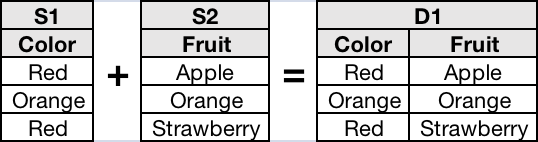

Series is a one-dimensional vector, that is, a dataset with only one column (S1 and S2), while a dataframe is the composition of one or more series, in tabular form with rows and columns(D1), that is, a two-dimensional matrix.

## Task 4.

You are given two random variables X and Y.

E(X) = 0.5, Var(X) = 2

E(Y) = 7, Var(Y) = 3.5

cov (X, Y) = -0.8

Find the variance of the random variable Z = 2X - 3Y

In [29]:
import numpy as np

x = [2, 3.5]
y = [0.5, 7]
cov_x_y = np.cov(x,y)
var_x = np.var(x)
print('Covariance')
print(cov_x_y)
print()
print('Variance X')
print(var_x)

Covariance
[[ 1.125  4.875]
 [ 4.875 21.125]]

Variance X
0.5625


In [30]:
z = []
for x_, y_ in zip(x,y):
  z_ = 2*x_ - 3*y_
  z.append(z_)

var_z = np.var(z)
print('Variance Z')
print(var_z)

Variance Z
68.0625


## Task 5.

Omer trained a linear regression model and tested its performance on a test sample of 500
objects. On 400 of those, the model returned a prediction higher than expected by 0.5, and on
the remaining 100, the model returned a prediction lower than expected by 0.7.

What is the MSE for his model?

Limor claims that the linear regression model wasn't trained correctly, and we can do improve
it by changing all the answers by a constant value. What will be her MSE?

You can assume that Limor found the smallest error under her constraints.

Return two values - Omer's and Limor's MSE.

Answer: It is not possible to calculate MSE without training and testing values.